<a href="https://colab.research.google.com/github/Vidhii19/Digit-Classifier/blob/main/Digit_Classfier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Handwritten Digit Recognition**

<li>The MNIST (Modified National Institute of Standards and Technology) dataset includes handwritten digits total of 70,000 images consisting of 60,000 examples in training set and 10,000 examples in testing set, both with labeled images from 10 digits (0 to 9).</li>
<li> Handwritten digits are images in the form of 28*28 gray scale intensities of images representing an image along with the first column to be a label (0 to 9) for every image. </li>

There are four files of training and testing:
<ul type="none">
<li>Training set images files (train-images.idx3-ubyte)</li>
<li>Training set labels file (train-labels.idx1-ubyte)</li>
<li>Test set images files (t10k-images.idx3-ubyte)</li>
<li>Test set label files (t10k-labels.idx1-ubyte)</li>

In [ ]:
import os
import struct
from array import array


class MNIST(object):
    def __init__(self, path='.'):
        self.path = path

        self.test_img_fname = 't10k-images-idx3-ubyte'
        self.test_lbl_fname = 't10k-labels-idx1-ubyte'

        self.train_img_fname = 'train-images-idx3-ubyte'
        self.train_lbl_fname = 'train-labels-idx1-ubyte'

        self.test_images = []
        self.test_labels = []

        self.train_images = []
        self.train_labels = []

    def load_testing(self):
        ims, labels = self.load(os.path.join(self.path, self.test_img_fname),
                                os.path.join(self.path, self.test_lbl_fname))

        self.test_images = ims
        self.test_labels = labels

        return ims, labels

    def load_training(self):
        ims, labels = self.load(os.path.join(self.path, self.train_img_fname),
                                os.path.join(self.path, self.train_lbl_fname))

        self.train_images = ims
        self.train_labels = labels

        return ims, labels

    @classmethod
    def load(cls, path_img, path_lbl):
        with open(path_lbl, 'rb') as file:
            magic, size = struct.unpack(">II", file.read(8))
            if magic != 2049:
                raise ValueError('Magic number mismatch, expected 2049,'
                                 'got {}'.format(magic))

            labels = array("B", file.read())

        with open(path_img, 'rb') as file:
            magic, size, rows, cols = struct.unpack(">IIII", file.read(16))
            if magic != 2051:
                raise ValueError('Magic number mismatch, expected 2051,'
                                 'got {}'.format(magic))

            image_data = array("B", file.read())

        images = []
        for i in range(size):
            images.append([0] * rows * cols)

        for i in range(size):
            images[i][:] = image_data[i * rows * cols:(i + 1) * rows * cols]

        return images, labels

    @classmethod
    def display(cls, img, width=28, threshold=200):
        render = ''
        for i in range(len(img)):
            if i % width == 0:
                render += '\n'
            if img[i] > threshold:
                render += '@'
            else:
                render += '.'
        return render

In [ ]:
import pandas as pd 
import numpy as np
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.preprocessing import StandardScaler

**K Nearest Neighbour**


KNN Classifier

KNN Trained Classifier Confidence:  0.9751666666666666

Confusion Matrix: 
 [[589   0   0   0   0   1   1   0   0   0]
 [  1 710   1   0   0   0   0   1   0   0]
 [  3   3 553   3   0   0   2   6   1   2]
 [  0   2   1 591   0   8   0   3   3   2]
 [  0   3   0   0 521   0   0   0   0   9]
 [  4   0   1   9   1 543   7   0   1   2]
 [  2   4   0   0   1   7 601   0   0   0]
 [  0   7   0   0   1   0   0 634   0   5]
 [  2   4   0   8   1   5   2   3 553   3]
 [  1   2   1   2   2   1   0   4   0 556]]

Confusion Matrix for Test Data: 
 [[ 974    1    1    0    0    1    2    1    0    0]
 [   0 1133    2    0    0    0    0    0    0    0]
 [  10    8  992    2    1    0    1   15    3    0]
 [   0    3    3  976    1   13    1    7    2    4]
 [   3    9    0    0  941    0    4    2    1   22]
 [   5    0    0   14    2  862    3    1    2    3]
 [   5    3    0    0    3    2  945    0    0    0]
 [   0   24    4    0    2    0    0  987    0   11]
 [   7    3    5 

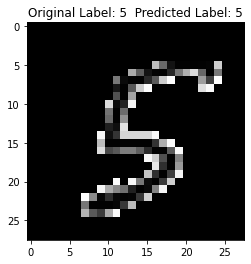

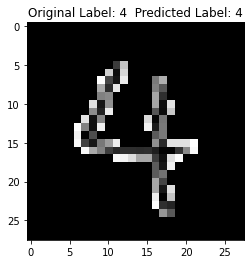

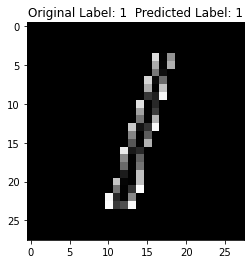

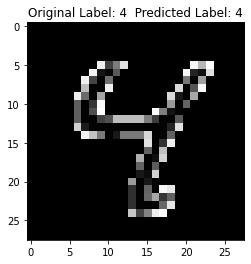

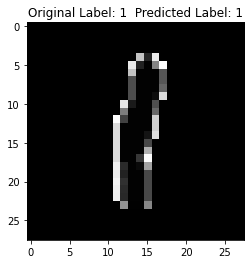

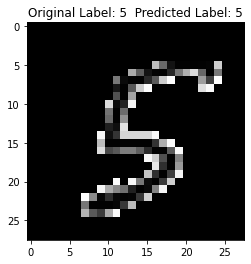

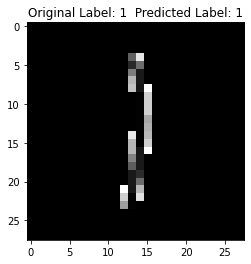

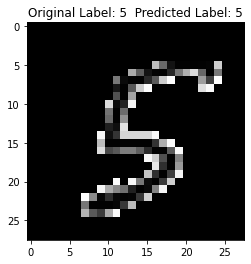

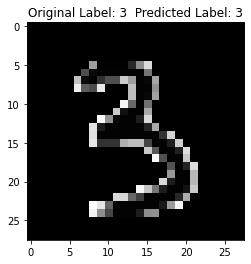

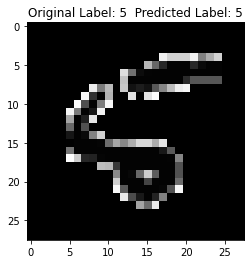

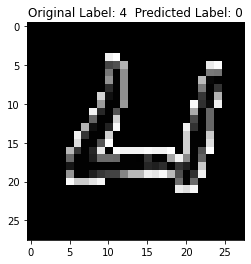

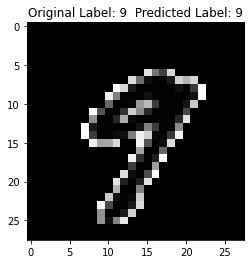

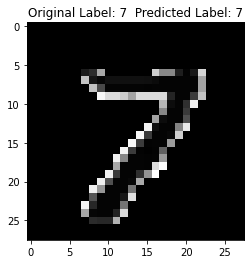

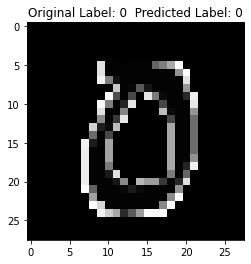

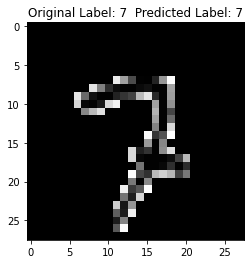

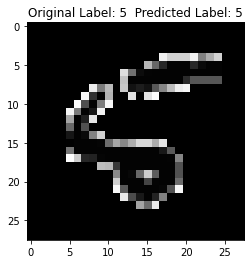

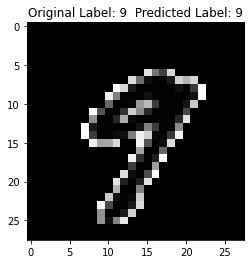

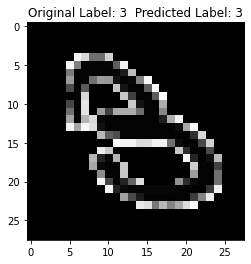

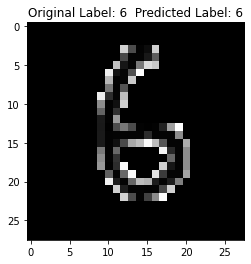

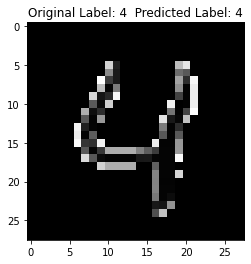

In [ ]:
# K Nearest Neighbors

import sys
import numpy as np
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from matplotlib import style

data = MNIST('dataset/')

img_train, labels_train = data.load_training()
train_img = np.array(img_train)
train_labels = np.array(labels_train)

img_test, labels_test = data.load_testing()
test_img = np.array(img_test)
test_labels = np.array(labels_test)

#Features
X = train_img

#Labels
y = train_labels

X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y,test_size=0.1)

print('\nKNN Classifier')
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train,y_train)

confidence = clf.score(X_test,y_test)

y_pred = clf.predict(X_test)

acc_knn = accuracy_score(y_test, y_pred)

conf_mat = confusion_matrix(y_test,y_pred)

print('\nKNN Trained Classifier Confidence: ',confidence)

print('\nConfusion Matrix: \n',conf_mat)

test_labels_pred = clf.predict(test_img)

acc_knn_t = accuracy_score(test_labels,test_labels_pred)

conf_mat_test = confusion_matrix(test_labels,test_labels_pred)

print('\nConfusion Matrix for Test Data: \n',conf_mat_test)

a = np.random.randint(1,50,20)
for i in a:
	two_d = (np.reshape(test_img[i], (28, 28)) * 255).astype(np.uint8)
	plt.title('Original Label: {0}  Predicted Label: {1}'.format(test_labels[i],test_labels_pred[i]))
	plt.imshow(two_d, interpolation='nearest',cmap='gray')
	plt.show()


In [ ]:
# KNN Accuracy
print('\nAccuracy of classifier on validation image data: ',acc_knn)
print('\nAccuracy of classifier on test images: ',acc_knn_t)


Accuracy of classifier on validation image data:  0.9751666666666666

Accuracy of classifier on test images:  0.9686


**Random Forest Classifier**


Random Forest Classifier

RFC Trained Classifier Confidence:  0.969

Confusion Matrix: 
 [[590   0   0   0   0   1   0   0   4   0]
 [  0 685   1   0   1   1   1   3   1   0]
 [  2   2 589   2   1   2   2   3   2   2]
 [  1   1   9 601   1   4   0   9  11   2]
 [  3   0   0   0 545   1   2   3   1  10]
 [  2   0   1   4   2 543   6   0   2   5]
 [  2   1   0   0   1   5 588   0   3   0]
 [  1   1   6   0   2   0   0 592   0   6]
 [  2   1   3   7   2   4   2   0 523   4]
 [  3   2   1   3   6   0   0   4   3 558]]

Confusion Matrix for Test Data: 
 [[ 971    0    1    0    0    1    2    1    4    0]
 [   0 1124    3    2    0    1    3    1    1    0]
 [   5    0 1002    5    4    0    3    9    4    0]
 [   0    0    9  971    0   10    0    9    8    3]
 [   1    0    3    0  955    0    5    0    2   16]
 [   4    0    1   13    3  859    5    1    4    2]
 [   6    3    1    0    2    4  939    0    3    0]
 [   2    4   20    0    1    0    0  987    3   11]
 [   4    0    5    

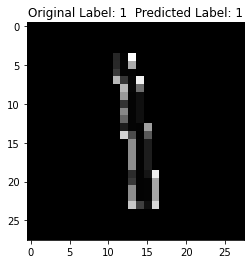

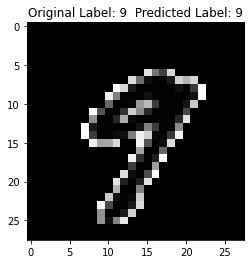

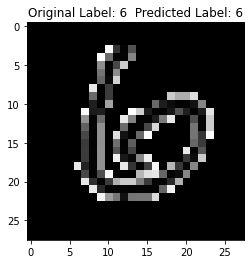

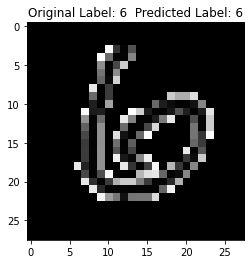

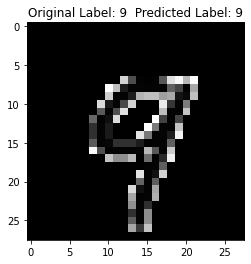

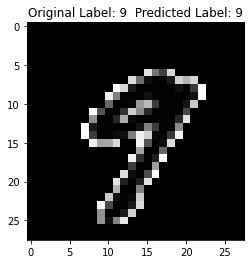

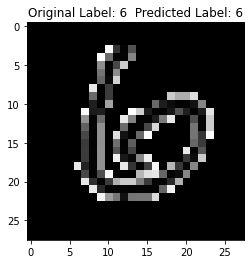

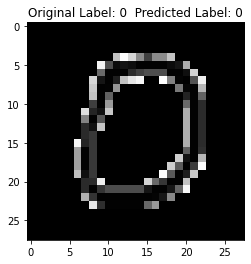

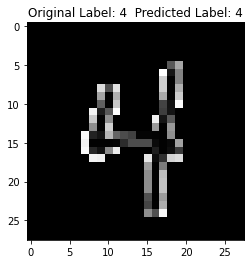

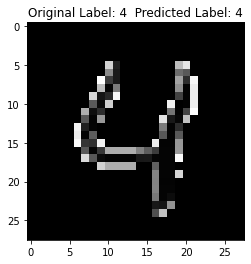

In [ ]:
# Random Forest Classifier

import sys
import numpy as np
import pickle
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from matplotlib import style

data = MNIST('dataset/')

img_train, labels_train = data.load_training()
train_img = np.array(img_train)
train_labels = np.array(labels_train)

img_test, labels_test = data.load_testing()
test_img = np.array(img_test)
test_labels = np.array(labels_test)

#Features
X = train_img

#Labels
y = train_labels

X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y,test_size=0.1)

print('\nRandom Forest Classifier')
clf = RandomForestClassifier(n_estimators=100, n_jobs=10)
clf.fit(X_train,y_train)

confidence = clf.score(X_test,y_test)

y_pred = clf.predict(X_test)

acc_rfc = accuracy_score(y_test, y_pred)

conf_mat = confusion_matrix(y_test,y_pred)

print('\nRFC Trained Classifier Confidence: ',confidence)
print('\nConfusion Matrix: \n',conf_mat)

test_labels_pred = clf.predict(test_img)

acc_rfc_t = accuracy_score(test_labels,test_labels_pred)

conf_mat_test = confusion_matrix(test_labels,test_labels_pred)

print('\nConfusion Matrix for Test Data: \n',conf_mat_test)

a = np.random.randint(1,30,10)
for i in a:
	two_d = (np.reshape(test_img[i], (28, 28)) * 255).astype(np.uint8)
	plt.title('Original Label: {0}  Predicted Label: {1}'.format(test_labels[i],test_labels_pred[i]))
	plt.imshow(two_d, interpolation='nearest',cmap='gray')
	plt.show()
#------------------------- EOC -----------------------------

In [ ]:
# RFC Accuracy
print('\nAccuracy of classifier on validation image data: ',acc_rfc)
print('\nAccuracy of classifier on test images: ',acc_rfc_t)


Accuracy of classifier on validation image data:  0.969

Accuracy of classifier on test images:  0.9701


**Support vector machine**


Confusion Matrix for Test Data: 
 [[ 972    0    1    1    0    3    1    0    2    0]
 [   0 1126    2    1    0    1    3    0    2    0]
 [   7    2 1005    0    2    1    4    8    3    0]
 [   1    2    1  986    0    6    0    4    6    4]
 [   3    0    1    0  964    0    4    1    0    9]
 [   4    0    1   12    1  863    3    1    4    3]
 [   5    5    1    0    3    6  936    0    2    0]
 [   0    9   10    2    1    0    0 1000    0    6]
 [   5    0    1    7    4    5    1    4  945    2]
 [   2    7    1    4   11    2    1    3    4  974]]


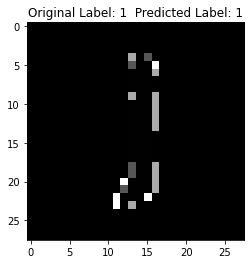

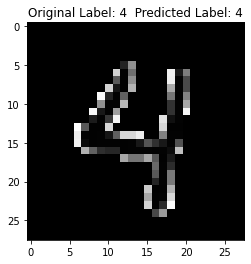

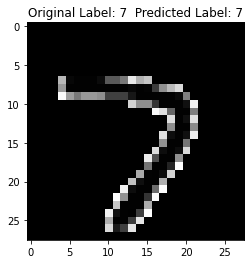

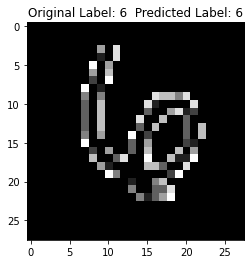

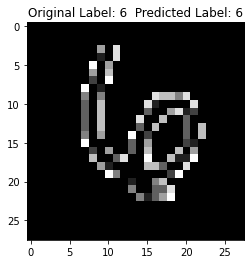

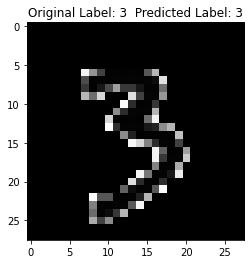

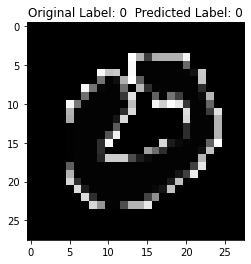

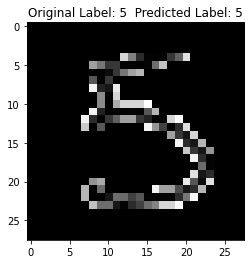

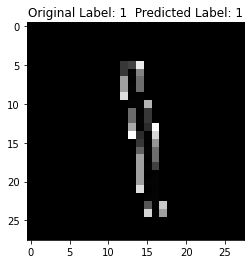

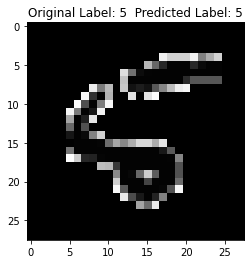

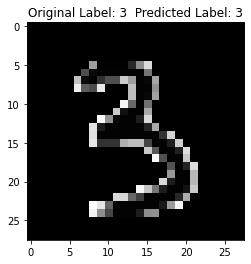

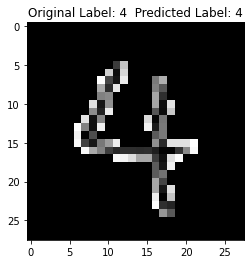

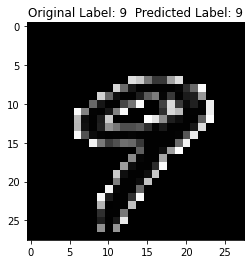

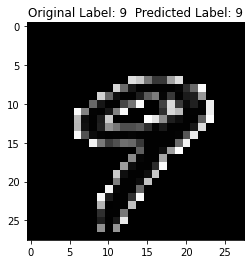

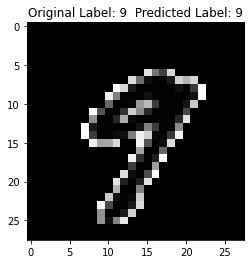

In [ ]:
# SVM

import sys
import numpy as np
import pickle
from sklearn import model_selection, svm, preprocessing
from sklearn.metrics import accuracy_score,confusion_matrix
import matplotlib.pyplot as plt

# Load MNIST Data
data = MNIST('dataset/')

img_train, labels_train = data.load_training()
train_img = np.array(img_train)
train_labels = np.array(labels_train)

img_test, labels_test = data.load_testing()
test_img = np.array(img_test)
test_labels = np.array(labels_test)

#Features
X = train_img

#Labels
y = train_labels

X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y,test_size=0.1)
clf = svm.SVC(gamma=0.1, kernel='poly')
clf.fit(X_train,y_train)

acc_svm = clf.score(X_test,y_test)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

conf_mat = confusion_matrix(y_test,y_pred)

test_labels_pred = clf.predict(test_img)

acc_svm_t = accuracy_score(test_labels,test_labels_pred)

conf_mat_test = confusion_matrix(test_labels,test_labels_pred)

print('\nConfusion Matrix for Test Data: \n',conf_mat_test)

a = np.random.randint(1,40,15)
for i in a:
	two_d = (np.reshape(test_img[i], (28, 28)) * 255).astype(np.uint8)
	plt.title('Original Label: {0}  Predicted Label: {1}'.format(test_labels[i],test_labels_pred[i]))
	plt.imshow(two_d, interpolation='nearest',cmap='gray')
	plt.show()

In [ ]:
#SVM Accuracy
print('\nAccuracy of Classifier on Validation Images: ',acc_svm)
print('\nAccuracy of Classifier on Test Images: ',acc_svm_t)


Accuracy of Classifier on Validation Images:  0.9801666666666666

Accuracy of Classifier on Test Images:  0.9771


**Comparing the accuracy of the models**

In [ ]:
import seaborn as sns
def comparisonBar(dataset,acc_knn_t,acc_rfc_t,acc_svm_t):
	accuracy=[acc_knn_t*100,acc_rfc_t*100,acc_svm_t*100]
	plt.title("For Dataset "+dataset)
	methods=["KNN","RFC","SVM"]
	colors=["red","blue","green"]
	sns.set_style("whitegrid")
	plt.yticks(np.arange(0,100,10))
	plt.ylabel("Accuracy%")
	plt.xlabel("Algorithms")
	sns.barplot(x=methods,y=accuracy,palette=colors)

Comparing the three models:
96.86 97.01 97.71


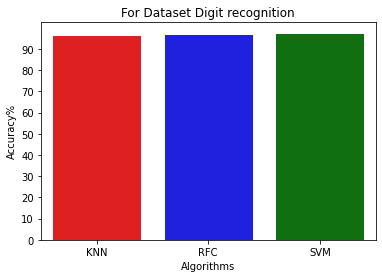

In [ ]:
import matplotlib.pyplot as plt
print("Comparing the three models:")
comparisonBar("Digit recognition",acc_knn_t,acc_rfc_t,acc_svm_t)
print(float("{:.2f}".format(acc_knn_t*100)),float("{:.2f}".format(acc_rfc_t*100)),float("{:.2f}".format(acc_svm_t*100)))

Compared to the three models we have achieved the highest accuracy for SVM model i.e 97.87%.